
TOMATO LEAF DETECTION 

PROBLEM STATEMENT:
    Tomato is the most popular crop in the world and in every kitchen, it is found in different forms irrespective of the cuisine. After potato and sweet potato, it is the crop which is cultivated worldwide. India ranked 2 in the production of tomato. However, the quality and quantity of tomato crop goes down due to the various kinds of diseases. So, to detect the disease a deep learning-based approach is discussed in this notebook.

    
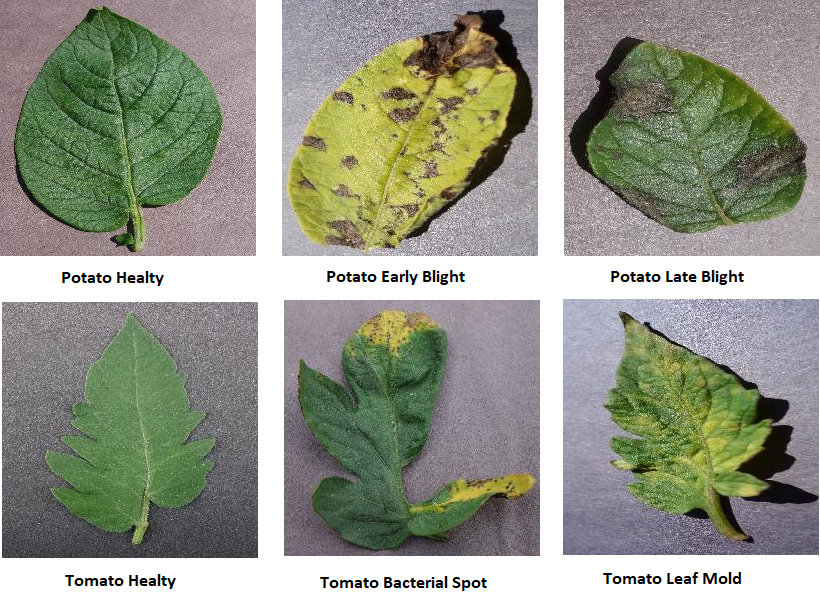

DISEASES: 
       There are different kinds of diseases they are
    
*   Tomato___Bacterial_spot
*   Tomato___Early_blight
*   Tomato___Late_blight
*   Tomato___Leaf_Mold
*   Tomato___Septoria_leaf_spot
*   Tomato___Spider_mites Two-spotted_spider_mite
*   Tomato___Target_Spot
*   Tomato___Tomato_Yellow_Leaf_Curl_Virus
*   Tomato___Tomato_mosaic_virus

MODEL USED:   
    For the disease detection and classification,Transfer Learning technique called "Inception_V3" is used.

INCEPTION_V3 ARCHITECTURE:    
    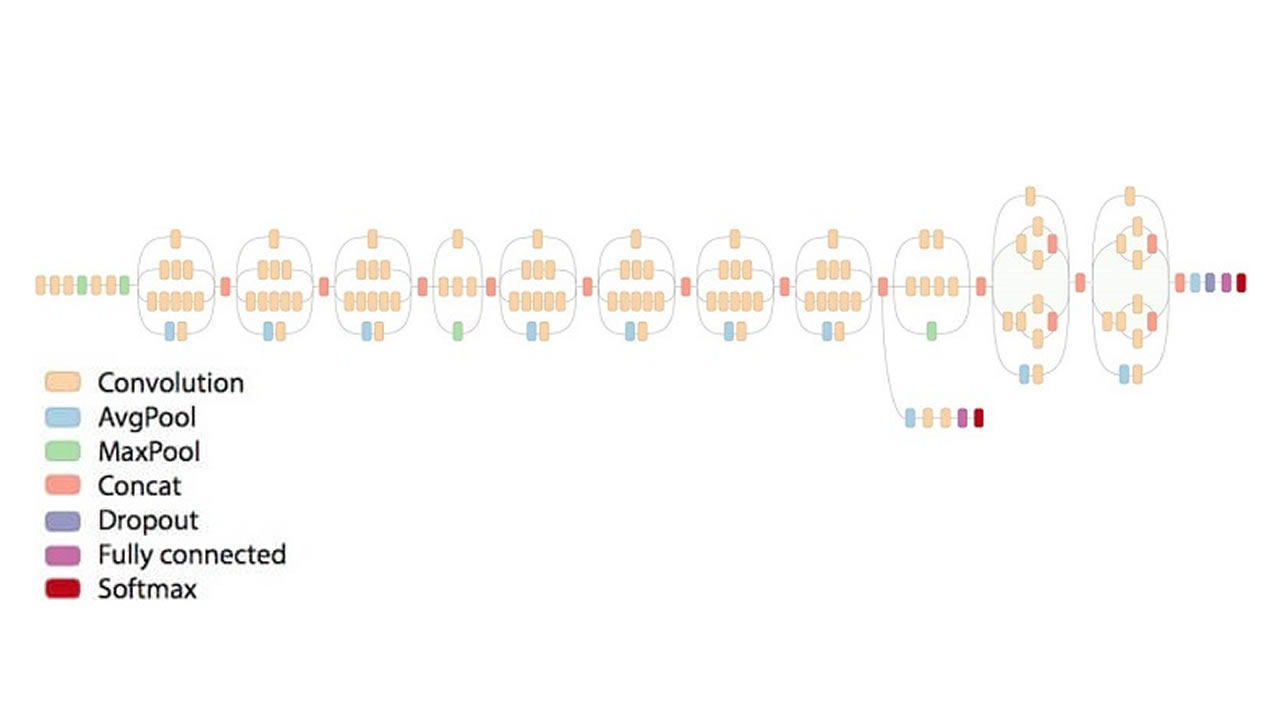

     

In [ ]:
#Installing kaggle module in colab for downloading the dataset. 
!pip install -q kaggle

In [ ]:
#making a kaggle directory.
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Downloading the tomato leaf data from kaggle.
!kaggle datasets download -d noulam/tomato

 99% 733M/743M [00:25<00:00, 27.3MB/s]
100% 743M/743M [00:26<00:00, 29.0MB/s]


In [ ]:
#moving downloaded datato new folder 'tomatodisease'.
!mkdir tomatodisease
!mv tomato.zip tomatodisease

In [ ]:
%cd tomatodisease/

/content/tomatodisease


In [ ]:
#downloaded data is in zip format.so,we need to unzip the file.
!unzip tomato.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac249839-fe21-45cd-9e09-f0023fa7ee3a___GH_HL Leaf 273.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdbf632-8d26-472d-874f-6d7df5cd0432___RS_HL 9897.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdf2283-0e7c-4ccd-8817-1019e3a8ed20___RS_HL 9943.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acf28842-7821-4f31-ab73-2787e332e852___RS_HL 0011.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ad6857d9-7cf0-42ec-b61b-7b5208863831___RS_HL 0320.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___h

In [ ]:
#importing tensorflow library.
import tensorflow as tf
tf.__version__

'2.3.1'

In [ ]:
#importing required libraries 
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
#Setting the image size as 224,224.
IMAGE_SIZE=[224,224]

In [ ]:
train_path='/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train'
test_path='/content/tomatodisease/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
#intializing the inception model 
inception=InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

87916544/87910968 [==============================] - 2s 0us/step


In [ ]:
#we are not training the entire model.we are using only weights of model.
for layer in inception.layers:
  layer.trainable=False


In [ ]:
#checking no of folders in train data.each folders is of diff class.
folders=glob('/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train/*')

In [ ]:
#There are 10 classes in the train data.
folders

['/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus']

In [ ]:
#importing matplotlib library for visualization.
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Bacterial Spot')

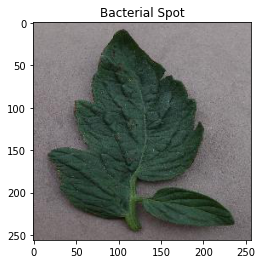

In [ ]:
#visualizing sample image from 'Bacterial spot' class.
plt.imshow(plt.imread('/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'))
plt.title('Bacterial Spot')

Text(0.5, 1.0, 'Early blight')

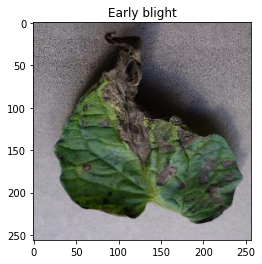

In [ ]:
#visualizing sample image from 'Early blight' class.
plt.imshow(plt.imread('/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight/0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG'))
plt.title('Early blight')

Text(0.5, 1.0, 'Late blight')

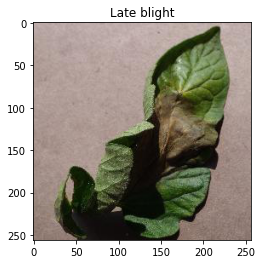

In [ ]:
#visualizing sample image from 'Late blight' class.
plt.imshow(plt.imread('/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight/0003faa8-4b27-4c65-bf42-6d9e352ca1a5___RS_Late.B 4946.JPG'))
plt.title('Late blight')

Text(0.5, 1.0, 'Healthy')

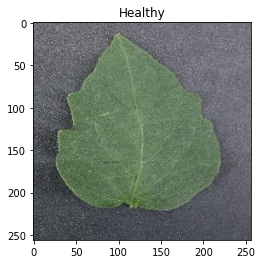

In [ ]:
#visualizing sample image from 'Healty leaf' class.
plt.imshow(plt.imread('/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG'))
plt.title('Healthy')

Text(0.5, 1.0, 'Target Spot')

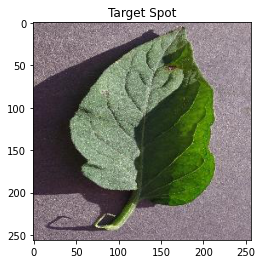

In [ ]:
#visualizing sample image from 'Target spot' class.
plt.imshow(plt.imread('/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG'))
plt.title('Target Spot')

In [ ]:
#flatterning Convolution layers.
x=Flatten()(inception.output)
#adding final layer.
prediction=Dense(len(folders),activation='softmax')(x)

model=Model(inputs=inception.input,outputs=prediction)


In [ ]:
#checking the summary of model.
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
#compling our model with adam optimizers,metric as accuracy.
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
#Data Augmentation
# Used ImageDataGenerator used to generate more images from existing images and then train the model on the same.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True
                                 )

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/tomatodisease/New Plant Diseases Dataset(Augmented)/train',
                                               target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')

Found 18345 images belonging to 10 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('/content/tomatodisease/New Plant Diseases Dataset(Augmented)/valid',
                                          target_size=(224,224),
                                          batch_size=16,
                                          class_mode='categorical'
                                          )

Found 4585 images belonging to 10 classes.


In [ ]:
#Fitting our model to training and test data with 10 epoches.
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
1147/1147 [==============================] - 299s 261ms/step - loss: 4.0587 - accuracy: 0.6836 - val_loss: 3.5716 - val_accuracy: 0.7570
Epoch 2/10
1147/1147 [==============================] - 299s 261ms/step - loss: 3.6290 - accuracy: 0.7870 - val_loss: 5.1761 - val_accuracy: 0.7522
Epoch 3/10
1147/1147 [==============================] - 303s 264ms/step - loss: 3.3599 - accuracy: 0.8207 - val_loss: 4.3945 - val_accuracy: 0.8013
Epoch 4/10
1147/1147 [==============================] - 302s 263ms/step - loss: 3.0929 - accuracy: 0.8410 - val_loss: 3.8510 - val_accuracy: 0.8131
Epoch 5/10
1147/1147 [==============================] - 303s 264ms/step - loss: 3.1662 - accuracy: 0.8523 - val_loss: 4.4419 - val_accuracy: 0.8129
Epoch 6/10
1147/1147 [==============================] - 305s 266ms/step - loss: 2.8100 - accuracy: 0.8660 - val_loss: 6.4884 - val_accuracy: 0.7869
Epoch 7/10
1147/1147 [==============================] - 304s 265ms/step - loss: 2.8848 - accuracy: 0.8705 - val_

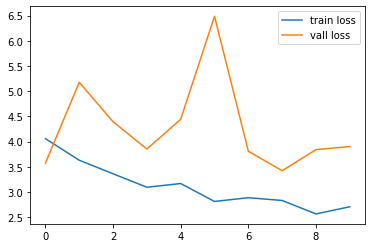

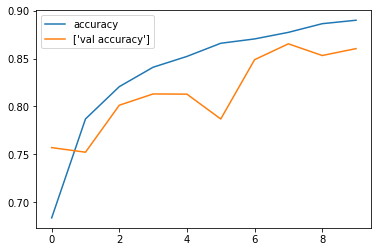

In [ ]:
#ploting accuracy and loss graph.
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='vall loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label=['val accuracy'])
plt.legend()
plt.show()

In [ ]:
#saving our trained model as 'model_inception.h5'.
from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [ ]:
#Doing prediction on  test data.
y_pred=model.predict(test_set)

In [ ]:
y_pred

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 6.7797237e-23, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [9.8841745e-01, 1.1550030e-02, 4.6008474e-24, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0018928e-17, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [ ]:
#considering highest predicted probability values from the diff classes.
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 6, ..., 9, 0, 9])

In [ ]:
#importing the libraries for loading the saved model.
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
#reading a sample image from test data 
test_img=image.load_img('/content/tomatodisease/New Plant Diseases Dataset(Augmented)/valid/Tomato___healthy/0aacdad5-c9b9-4309-96e3-0797bbed1375___RS_HL 9836.JPG',target_size=(224,224))

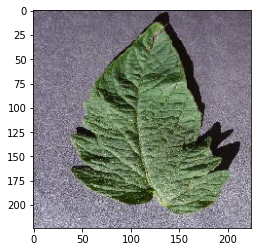

In [ ]:
#visualising the sample image.
plt.imshow(test_img)

In [ ]:
#converting the img to array for prediction.
x=image.img_to_array(test_img)


In [ ]:
x

array([[[110., 103., 121.],
        [103.,  96., 114.],
        [121., 114., 132.],
        ...,
        [ 93.,  85., 100.],
        [102.,  94., 109.],
        [102.,  94., 109.]],

       [[124., 117., 135.],
        [111., 104., 122.],
        [114., 107., 125.],
        ...,
        [104.,  96., 111.],
        [114., 106., 121.],
        [114., 106., 121.]],

       [[ 91.,  84., 102.],
        [ 94.,  87., 105.],
        [108., 101., 119.],
        ...,
        [ 86.,  78.,  93.],
        [ 91.,  83.,  98.],
        [ 87.,  79.,  94.]],

       ...,

       [[144., 141., 158.],
        [112., 109., 126.],
        [168., 165., 182.],
        ...,
        [160., 158., 172.],
        [112., 110., 124.],
        [161., 159., 173.]],

       [[180., 177., 194.],
        [135., 132., 149.],
        [125., 122., 139.],
        ...,
        [161., 159., 173.],
        [163., 161., 175.],
        [125., 123., 137.]],

       [[140., 137., 154.],
        [167., 164., 181.],
        [190., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
#scaling and preprocessing  the image
x=x/225
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
#prediction on sample image.
model.predict(img_data)

array([[4.7921826e-25, 9.9997067e-01, 2.9344486e-05, 1.9895407e-11,
        4.3393342e-08, 1.0831026e-18, 7.6635088e-22, 1.3455329e-34,
        4.2398425e-11, 1.0437228e-16]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data),axis=1)

In [ ]:
a==1

array([ True])

In [ ]:
#loading the saved model
import tensorflow as tf
model_incep=tf.keras.models.load_model('model_inception.h5')

In [ ]:
#there are 10 different classes in the data.
class_dict = training_set.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [ ]:
#Defining a function which automatically read the image, standardize the image and perform prediction. 
def predict(filepath):
  img=cv2.imread(filepath,cv2.IMREAD_COLOR)  #reading the image
  img=img/255   #standardizing the image.
  new_array=cv2.resize(img,(224,224)) #resizing the image
  img_array= new_array.reshape(-1,224,224,3)  #reshaping the image.
  preds=model_incep.predict(img_array)   #predicting the image.
  
 #Below condition statements returns the class associated with the images.
  if np.argmax(preds) == 0:
    print("Bacterial_spot")
  elif np.argmax(preds) == 1:
    print("Early_Blight")
  elif np.argmax(preds) == 2:
    print("Late Blight")
  elif np.argmax(preds) == 3:
    print("Leaf Mold")
  elif np.argmax(preds) == 4:
    print("Septoria Leaf Mold")
  elif np.argmax(preds) == 5:
    print("Spider mites")
  elif np.argmax(preds) == 6:
    print("Target Spot")
  elif np.argmax(preds) == 7:
    print("Yellow Leaf Curl Virus")
  elif np.argmax(preds) == 8:
    print("Mosaic Virus")
  else:
    print("Healthy")


In [ ]:
#Our model correctly predicts the 'Bacterial spot' as 'Bacterial spot'.
predict('/content/tomatodisease/New Plant Diseases Dataset(Augmented)/valid/Tomato___Bacterial_spot/01d9fc8d-5083-468d-a583-885f33517cdd___GCREC_Bact.Sp 3422.JPG')

Bacterial_spot


In [ ]:
#Our model correctly predicts the 'Mosaic virus' as 'Mosaic Virus'.
predict('/content/tomatodisease/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_mosaic_virus/0a91f50b-1263-4b2c-a8c1-f2a6025b82f3___PSU_CG 2136_270deg.JPG')

Mosaic Virus


In [ ]:
#Our model correctly predicts the 'Healthy' as 'Healthy'.
predict('/content/tomatodisease/New Plant Diseases Dataset(Augmented)/valid/Tomato___healthy/0c4b06d5-4053-44fc-99b6-504934fdd3a9___GH_HL Leaf 199.1_new30degFlipLR.JPG')

Healthy
